# Best Pittsburgh Neighborhood by Livability

Our group came decided to investigate which neighborhood in Pittsburgh was the best by using the metric of livability. There are a number of different submetrics That can be used to measure this, but the on I chose to investigate was land use.

#### NOTE: THE DATA USED IS FROM 2010 AND MAY NOT BE THE BEST REFLECTION OF WHAT IS CURRENTLY THE BEST NEIGHBORHOOD. 

## Metric Explained

For choosing the best neighborhood in Pittsburgh, one must focus on how livable it is because logistically, a livable neighborhood is what fulfills its definitive property of being a community (of sorts). The way a Land is used tells us a lot about the neighborhood in that area. A land that is used mainly for residential use creates more of a suburban environment; land that is primarly used for commercial use has a lot of businesses, shops, hotels, etc. and thus, facilities that provide people with food, money, and work; land that is primarily used for industrial use is used for powerplants, factories, and storage facilities and may not be ideal for the surrounding environment (polution). In this sense, Land use is important as it helps us determine what environment will provide a balanced and healthy life for the individual. So, the metric for determining livability based on land use is such: (Ranked by priority)

1. Because industrial facilities are primarily closed to the public, they are not necessarily add to livability. In fact, they hinder it because of the polution factories may cause.
   - Industrial Use preferrably 0%, but mainly below 5% to account for variation
2. Open space is necessary for allowing nature and green areas which are important to the overall health and well being of people. But if there is mainly open space then the area may be a bit rural.
   - Open Space from 30% to 75% (75% open space to account for higher end neighborhoods)
3. Enough people per acre that it is not too isolated, but also not too crowded. 
   - Residential use up to 25% - 75%
4. Enough shops, restaurants, and businesses to sustain economy of community and not create a loud environment. Commercial Use is not necessary because Pittsburgh usually requires you to have a car or public transportation to be able to reach a lot of places. Therefore, people can use cars to reach places with higher commercial use.
   - Commercial Use up to 75%
5. A place that's completely flat may be susceptible to flooding and a place too hilly may not be convenient for walking. Not necessarily as important as flooding is not too much of an issue with Pittsburgh being away from the coast, generally hilly, and the river not necessarily flooding to such an extreme. 
   - Hillside not more than 25%

## Initial Data Set

This is the data set I will be using. Only first 5 rows are displayed.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

data = pd.read_csv("landuse.csv")

data.head(5)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
0,Allegheny Center,3,933,134.4,0.0%,49.4%,0.0%,0.0%,50.6%,0.0%,0.0%
1,Allegheny West,3,462,90.2,42.1%,12.5%,6.3%,26.4%,12.6%,0.0%,0.0%
2,Allentown,6,"2,500",188.8,54.6%,9.3%,0.0%,0.0%,18.5%,17.6%,0.0%
3,Arlington,7,"1,869",300.8,43.7%,3.8%,10.9%,0.0%,41.6%,0.0%,0.0%
4,Arlington Heights,7,244,84.5,56.5%,0.0%,0.0%,0.0%,43.4%,0.0%,0.0%




Because industrial use is preferrably lower than 5% and ranked highest in priority, we will filter the data out by only selecting the most livable neighborhood from those which have a low industrial use. 

First, we must convert all the percentages to float numbers for the rows we are using so the code is able to filter through the data based on our requirements. 

In [109]:

ind_number = 0

for index, row in data.iterrows():
    
    ## column values
    
    indnumber_string = row['Mixed Use / Industrial']
    open_string = row['Open Space']
    res_string = row['Residential']
    comm_string = row['Mixed Use / Commercial']
    hill_string = row['Hillside']
    
    ##Industrial
    
    indnumber = indnumber_string.rstrip('%')
    ind_replace = float(indnumber)
    data['Mixed Use / Industrial'].replace([indnumber_string], ind_replace, inplace = True)
    
    ##Open Space
    
    opennumber = open_string.rstrip('%')
    open_replace = float(opennumber)
    data['Open Space'].replace([open_string], open_replace, inplace = True)
    
    ##Residential
    
    resnumber = res_string.rstrip('%')
    res_replace = float(resnumber)
    data['Residential'].replace([res_string], res_replace, inplace = True)
    
    ##Commercial
    
    commnumber = comm_string.rstrip('%')
    comm_replace = float(commnumber)
    data['Mixed Use / Commercial'].replace([comm_string], comm_replace, inplace = True)
    
    ##Hillside
    
    hillnumber = hill_string.rstrip('%')
    hill_replace = float(hillnumber)
    data['Hillside'].replace([hill_string], hill_replace, inplace = True)
    

In [134]:
indMask = data['Mixed Use / Industrial'] <= 5.0
ind_Data = data[indMask]

ind_Data.head(10)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
0,Allegheny Center,3,933,134.4,0.0,49.4,0.0,0.0%,50.6,0.0,0.0%
2,Allentown,6,"2,500",188.8,54.6,9.3,0.0,0.0%,18.5,17.6,0.0%
4,Arlington Heights,7,244,84.5,56.5,0.0,0.0,0.0%,43.4,0.0,0.0%
5,Banksville,5,"4,144",620.2,72.0,7.8,4.9,0.0%,15.2,0.0,0.0%
6,Bedford Dwellings,15,"1,202",114.6,59.5,0.0,2.7,0.0%,37.6,0.2,0.0%
7,Beechview,5,"7,974",934.4,56.4,4.4,1.3,0.0%,2.4,35.5,0.0%
8,Beltzhoover,6,"1,925",269.4,64.7,2.7,1.3,0.0%,20.0,11.3,0.0%
13,Brookline,5,"13,214","1,332.5",71.6,4.1,2.5,0.0%,7.3,14.4,0.1%
15,Carrick,5,"10,113","1,070.7",65.2,5.0,3.2,0.0%,26.4,0.0,0.2%
16,Central Business District,16,"3,629",409.6,0.0,0.0,0.4,0.0%,9.1,0.1,90.4%


Now that we have industrial usage below 5.0%, we must filter through the already filtered data to find neighborhoods with open space in between 30% - 75%

In [135]:
firstopenMask = ind_Data['Open Space'] >= 30.0
open_filteredData = ind_Data[firstopenMask]

openMask = open_filteredData['Open Space'] <= 75.0
open_Data = open_filteredData[openMask]

open_Data.head(10)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
0,Allegheny Center,3,933,134.4,0.0,49.4,0.0,0.0%,50.6,0.0,0.0%
4,Arlington Heights,7,244,84.5,56.5,0.0,0.0,0.0%,43.4,0.0,0.0%
6,Bedford Dwellings,15,"1,202",114.6,59.5,0.0,2.7,0.0%,37.6,0.2,0.0%
24,Duquesne Heights,6,"2,425",398.7,36.1,1.4,3.6,0.0%,54.7,0.1,4.2%
39,Highland Park,12,"6,395",744.3,44.1,0.9,0.0,0.0%,54.9,0.0,0.0%
46,Lincoln-Lemington-Belmar,11,"4,883","1,159.7",32.3,6.4,1.6,17.4%,42.4,0.0,0.0%
54,New Homestead,8,990,508.2,67.0,0.0,0.3,0.0%,32.8,0.0,0.0%
57,Northview Heights,1,"1,214",200.3,53.1,1.0,3.3,0.0%,42.5,0.1,0.0%
60,Perry North,2,"4,050",775.7,38.4,1.0,0.0,0.0%,44.9,15.6,0.0%
62,Point Breeze,10,"5,315",642.6,60.5,0.8,0.0,0.0%,38.6,0.0,0.0%


Now we want Residential Use from 25% - 75% 

In [136]:
firstresMask = open_Data['Residential'] >= 25.0
res_filteredData = open_Data[firstresMask]

resMask = res_filteredData['Residential'] <= 75.0
res_Data = res_filteredData[resMask]

res_Data.head(20)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
4,Arlington Heights,7,244,84.5,56.5,0.0,0.0,0.0%,43.4,0.0,0.0%
6,Bedford Dwellings,15,"1,202",114.6,59.5,0.0,2.7,0.0%,37.6,0.2,0.0%
24,Duquesne Heights,6,"2,425",398.7,36.1,1.4,3.6,0.0%,54.7,0.1,4.2%
39,Highland Park,12,"6,395",744.3,44.1,0.9,0.0,0.0%,54.9,0.0,0.0%
46,Lincoln-Lemington-Belmar,11,"4,883","1,159.7",32.3,6.4,1.6,17.4%,42.4,0.0,0.0%
54,New Homestead,8,990,508.2,67.0,0.0,0.3,0.0%,32.8,0.0,0.0%
57,Northview Heights,1,"1,214",200.3,53.1,1.0,3.3,0.0%,42.5,0.1,0.0%
60,Perry North,2,"4,050",775.7,38.4,1.0,0.0,0.0%,44.9,15.6,0.0%
62,Point Breeze,10,"5,315",642.6,60.5,0.8,0.0,0.0%,38.6,0.0,0.0%
65,Regent Square,10,928,122.9,45.1,0.4,0.0,0.0%,54.5,0.0,0.0%


Because there are only 13 neighborhoods remaining, we may have to alter our terms regarding commercial use and hillside. Because they were lower on the preference scale, they can be modified to fit the remaining data. The preference is that we choose a place with the highest commercial use possible. Hillside should preferrably be lower than 25.0%, which already seems the case with basic observation of the remaining data.

Let's create a bar graph to see how much commercial use each of the remaining neighborhoods has. 
First let's create a new data set for organizational purposes.

In [137]:
finalData = res_Data[['Neighborhood','Mixed Use / Commercial']].copy() ## Create new dataframe for only viewing Neighborhood and Commercial Use
finalData.head(20)

,Neighborhood,Mixed Use / Commercial
4,Arlington Heights,0.0
6,Bedford Dwellings,0.0
24,Duquesne Heights,1.4
39,Highland Park,0.9
46,Lincoln-Lemington-Belmar,6.4
54,New Homestead,0.0
57,Northview Heights,1.0
60,Perry North,1.0
62,Point Breeze,0.8
65,Regent Square,0.4


[Text(0, 0.5, 'Commercial Use Percentage'), Text(0.5, 0, 'Neighborhooda')]

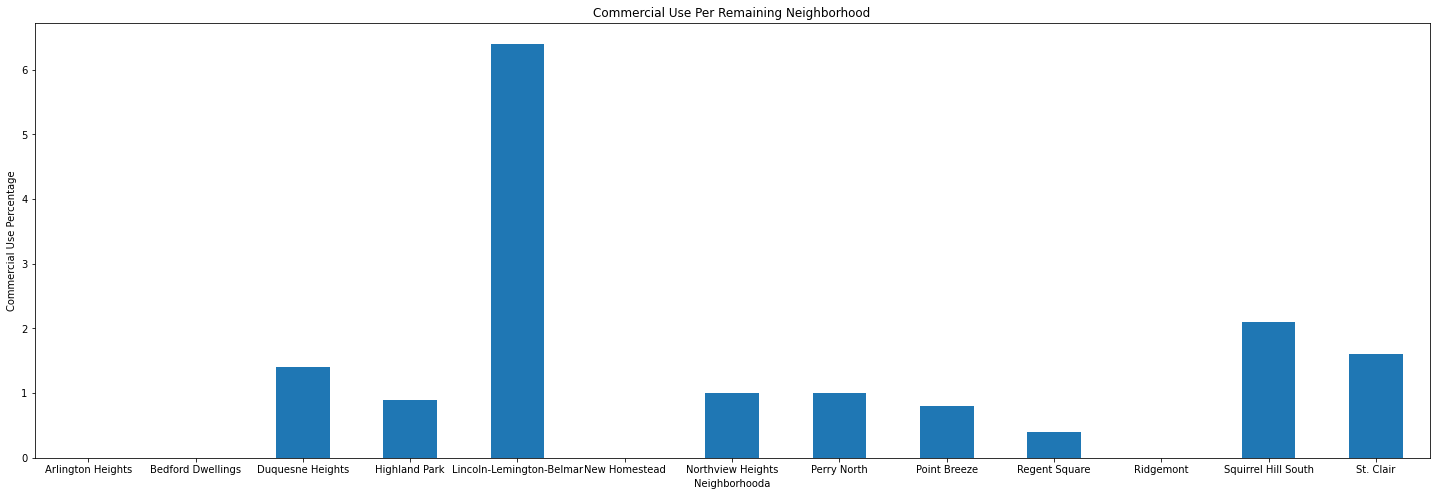

In [138]:
# Bar Graph
viewing = finalData.head(20).plot.bar(x='Neighborhood',
                                   y='Mixed Use / Commercial',
                                   rot = 0,
                                   figsize=(25, 8),
                                   legend = False,
                                   title='Commercial Use Per Remaining Neighborhood')
viewing.set(xlabel="Neighborhooda", ylabel="Commercial Use Percentage")

As we can see, Lincoln-Lemington-Belmar triumphs in the final criteria for the best neighborhood by holding the highest commercial use percentage out of the remaining neighborhoods. Squirrel Hill South  comes second and St. Clair comes in third.

Now to display the remaining neighborhoods by location of prefrences based on the last criteria of commercial use. 

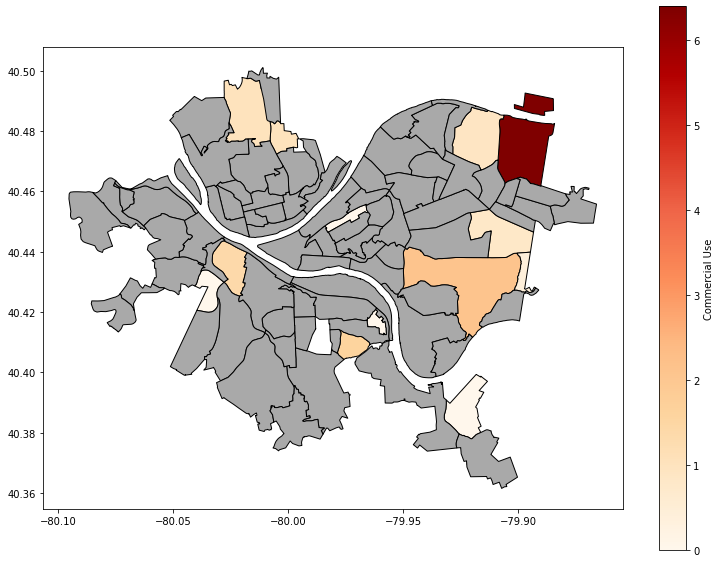

In [139]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
finalMap = neighborhoods.merge(finalData, how='left', left_on='hood', right_on='Neighborhood')
finalMap.plot(column='Mixed Use / Commercial',legend = True,
                cmap = "OrRd",
                edgecolor="black",
                legend_kwds={'label': "Commercial Use"},
                figsize=(13, 10),
                missing_kwds={"color": "darkgrey"}) 

#### To reiterate, Lincoln-Lemington-Belmar is the best neighborhood in pittsburgh based on my criteria and code. Squirrel Hill South comes second and St. Clair comes third. 